In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

C:\Users\RafaelHenriqueGallo\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
dados = pd.read_csv("Dados\credit-data.csv")
dados

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
...,...,...,...,...,...
1995,1996,59221.044874,48.518179,1926.729397,0
1996,1997,69516.127573,23.162104,3503.176156,0
1997,1998,44311.449262,28.017167,5522.786693,1
1998,1999,43756.056605,63.971796,1622.722598,0


In [3]:
dados.head(10)

,clientid,income,age,loan,default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [4]:
dados.shape

(2000, 5)

In [5]:
dados.describe()

,clientid,income,age,loan,default
count,2000.000000,2000.000000,1997.000000,2000.000000,2000.000000
mean,1000.500000,45331.600018,40.807559,4444.369695,0.141500
std,577.494589,14326.327119,13.624469,3045.410024,0.348624
min,1.000000,20014.489470,-52.423280,1.377630,0.000000
25%,500.750000,32796.459717,28.990415,1939.708847,0.000000
50%,1000.500000,45789.117313,41.317159,3974.719419,0.000000
75%,1500.250000,57791.281668,52.587040,6432.410625,0.000000
max,2000.000000,69995.685578,63.971796,13766.051239,1.000000


In [6]:
dados.columns = ["ID do cliente", "Renda", "Era", "Emprestimo", "padrão"]
dados.head(10)

,ID do cliente,Renda,Era,Emprestimo,padrão
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1
5,6,24904.064140,57.471607,15.498598,0
6,7,48430.359613,26.809132,5722.581981,0
7,8,24500.141984,32.897548,2971.003310,1
8,9,40654.892537,55.496853,4755.825280,0
9,10,25075.872771,39.776378,1409.230371,0


In [7]:
sorted(dados['Renda'].unique())

[20014.4894700497,
 20063.0995840766,
 20111.3632577471,
 20113.2534933276,
 20126.4137681574,
 20145.9885970689,
 20155.792362056698,
 20252.123456448302,
 20258.538662456,
 20310.5775569566,
 20346.4690526016,
 20358.665024396,
 20436.3312851638,
 20491.564325057,
 20511.4294355735,
 20532.8237311915,
 20542.365072760702,
 20568.891305010802,
 20583.6121737957,
 20595.934584271203,
 20598.9265628159,
 20617.261009756498,
 20622.860097792,
 20629.3472950347,
 20647.887645755,
 20660.6689537875,
 20674.897083081298,
 20686.2390902825,
 20710.7759593055,
 20715.535634663,
 20742.6969707012,
 20762.4744670466,
 20774.8458185233,
 20803.6145358346,
 20897.4266937003,
 20904.5554790646,
 20908.335100393702,
 20943.0433274247,
 21032.8186908737,
 21053.4906177782,
 21081.1941814609,
 21087.3555438593,
 21144.162146374598,
 21144.5628711954,
 21158.935285639,
 21194.6161743253,
 21211.5893885493,
 21217.7474563941,
 21243.9323007129,
 21258.9027755894,
 21293.4771250002,
 21306.0331228189,
 

In [8]:
sorted(dados['Era'].unique())

[-52.423279919661596,
 -36.4969755136408,
 -28.218361321371003,
 18.075335860718,
 18.130038363393396,
 18.2999803973362,
 18.3097456344403,
 18.326122155413,
 18.396969827823305,
 18.4162362311035,
 18.5286279926077,
 18.5843359269202,
 18.621307099238,
 18.6478525786661,
 18.6630267929286,
 18.6712893769145,
 18.695798727683695,
 18.8303362894803,
 18.840525757987105,
 18.8429928976111,
 18.874357114546,
 19.0816236077808,
 19.1324464869685,
 19.1351382303983,
 19.2075996422209,
 19.2277783197351,
 19.304691826459,
 19.329107891302602,
 19.3715205355547,
 19.497102680616106,
 19.6025430983864,
 19.6300378022715,
 19.716176087502397,
 19.8196311858483,
 19.8870530799031,
 19.9466844960116,
 19.9594523082487,
 20.0109276962467,
 20.039864229969695,
 20.0963994744234,
 20.105458715930602,
 20.118845096323604,
 20.1268885387108,
 20.1403118157759,
 20.1618777224794,
 20.2281011762097,
 20.2576053403318,
 20.3008601283655,
 20.4049915121868,
 20.560396471526502,
 20.5836314358748,
 20.585

In [9]:
sorted(dados['Emprestimo'].unique())

[1.37762959325451,
 8.01207624713557,
 15.498598437827196,
 22.327933177844,
 23.916427866718895,
 27.252482247280398,
 28.8825344418559,
 34.2851058172658,
 44.5272460985999,
 51.640260239487,
 51.949242778070094,
 52.872190279850905,
 53.1862073427052,
 54.0082423765092,
 56.16616438732,
 56.9909740698165,
 59.469163350624704,
 68.6254562680885,
 93.1526418784096,
 93.89580488374209,
 95.46072237503591,
 99.4495914003405,
 101.218538140203,
 106.09074717934999,
 107.597231536379,
 108.62991134456199,
 109.379622752269,
 109.478853603893,
 110.202890548355,
 114.20988809934299,
 114.49996740621799,
 117.712586947864,
 118.34214214338499,
 135.931684494729,
 139.31457194860002,
 141.703817946414,
 154.945616250235,
 161.237551122297,
 162.79559613813998,
 165.506090118747,
 168.054785283069,
 178.333870986952,
 178.692471563294,
 184.74430235095198,
 186.828073932876,
 190.889274816911,
 192.144610510401,
 207.543817763712,
 217.18796207658002,
 217.48852796721002,
 222.19643863902402,

**Mediana**

In [10]:
dados["Renda"].median()

45789.11731252445

In [11]:
dados["Era"].median()

41.3171591130085

In [12]:
dados["Emprestimo"].median()

3974.7194188426342

**Média**

In [13]:
dados["Renda"].mean()

45331.60001779331

In [14]:
dados["Era"].mean()

40.80755937840458

In [15]:
dados["Emprestimo"].mean()

4444.369694688262

**Moda**

In [16]:
dados["Renda"].mode()

0       20014.489470
1       20063.099584
2       20111.363258
3       20113.253493
4       20126.413768
            ...     
1995    69929.010996
1996    69939.329678
1997    69958.705541
1998    69992.332712
1999    69995.685578
Length: 2000, dtype: float64

In [17]:
dados["Era"].mode()

0      -52.423280
1      -36.496976
2      -28.218361
3       18.055189
4       18.055874
          ...    
1992    63.885044
1993    63.887141
1994    63.924976
1995    63.930735
1996    63.971796
Length: 1997, dtype: float64

In [18]:
dados["Emprestimo"].mode()

0           1.377630
1           8.012076
2          15.498598
3          22.327933
4          23.916428
            ...     
1995    13172.681298
1996    13190.365886
1997    13376.797706
1998    13443.473176
1999    13766.051239
Length: 2000, dtype: float64

# **Analise de dados**

In [19]:
dados.corr()

,ID do cliente,Renda,Era,Emprestimo,padrão
ID do cliente,1.000000,0.039280,-0.014704,0.018931,-0.020145
Renda,0.039280,1.000000,-0.033687,0.441117,0.002284
Era,-0.014704,-0.033687,1.000000,0.002309,-0.429759
Emprestimo,0.018931,0.441117,0.002309,1.000000,0.377160
padrão,-0.020145,0.002284,-0.429759,0.377160,1.000000


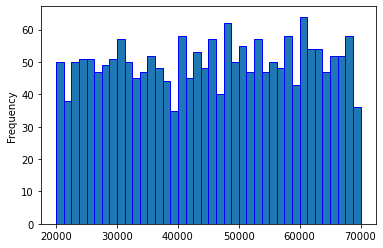

In [20]:
dados["Renda"].plot.hist(bins=40, edgecolor="Blue")

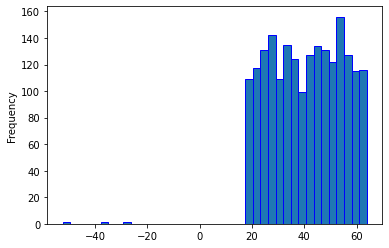

In [21]:
dados["Era"].plot.hist(bins=40, edgecolor="Blue")

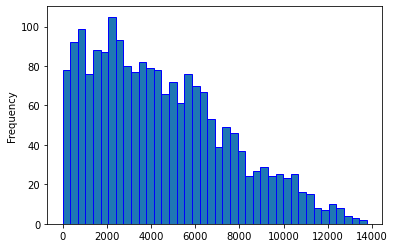

In [22]:
dados["Emprestimo"].plot.hist(bins=40, edgecolor="Blue")

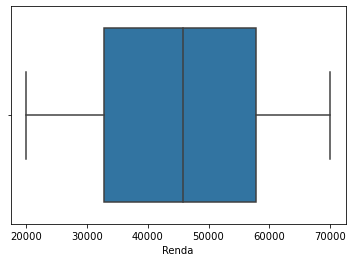

In [23]:
sns.boxplot(dados.Renda)

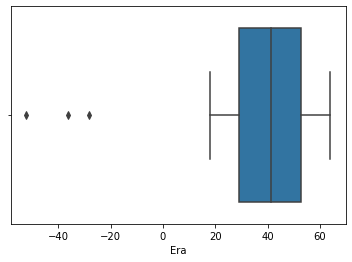

In [24]:
sns.boxplot(dados.Era)

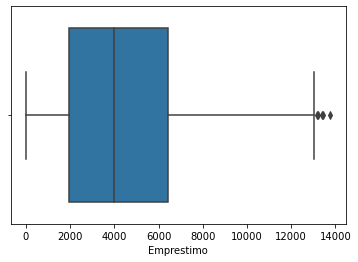

In [25]:
sns.boxplot(dados.Emprestimo)

[Text(0, 0.5, 'Valor'), Text(0.5, 0, 'Renda')]

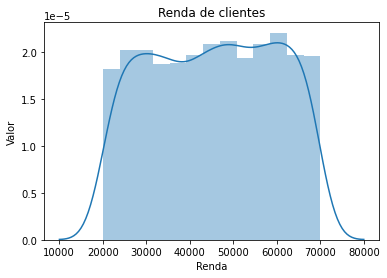

In [26]:
df1 = sns.distplot(dados.Renda)
df1.set_title("Renda de clientes")
df1.set(xlabel = "Renda", ylabel = "Valor")

[Text(0, 0.5, 'Valor'), Text(0.5, 0, 'Emprestimo')]

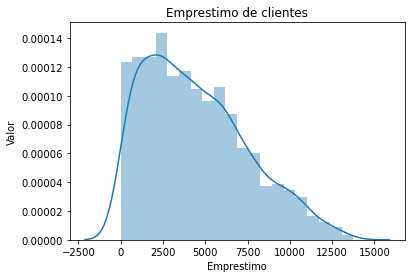

In [27]:
df2 = sns.distplot(dados.Emprestimo)
df2.set_title("Emprestimo de clientes")
df2.set(xlabel = "Emprestimo", ylabel = "Valor")

**Regressão linear**

Text(0, 0.5, 'Empréstimo')

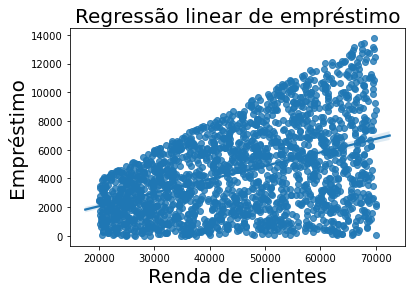

In [87]:
df3 = sns.regplot(x="Renda", y="Emprestimo", data=dados)
plt.title("Regressão linear de empréstimo", fontsize = 20)
plt.xlabel("Renda de clientes", fontsize = 20)
plt.ylabel("Empréstimo", fontsize = 20)

# Regressão linear modelo

In [29]:
x = dados["Renda"]
y = dados["Emprestimo"]

In [30]:
x

0       66155.925095
1       34415.153966
2       57317.170063
3       42709.534201
4       66952.688845
            ...     
1995    59221.044874
1996    69516.127573
1997    44311.449262
1998    43756.056605
1999    69436.579552
Name: Renda, Length: 2000, dtype: float64

In [31]:
y

0       8106.532131
1       6564.745018
2       8020.953296
3       6103.642260
4       8770.099235
           ...     
1995    1926.729397
1996    3503.176156
1997    5522.786693
1998    1622.722598
1999    7378.833599
Name: Emprestimo, Length: 2000, dtype: float64

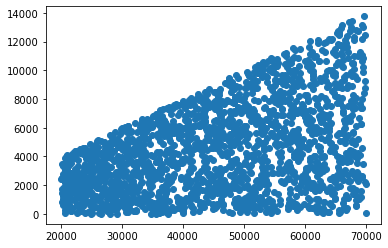

In [32]:
plt.scatter(x,y)

In [33]:
#Correlação linear
sample = dados.sample(n=200)
sample

,ID do cliente,Renda,Era,Emprestimo,padrão
662,663,21293.477125,42.404940,1368.691922,0
96,97,41970.724477,63.169914,1622.317392,0
1845,1846,45382.807897,42.516345,2742.454975,0
600,601,40484.971325,39.281433,1093.679203,0
1481,1482,61674.457234,54.829302,4054.551771,0
...,...,...,...,...,...
1428,1429,69191.233376,57.385185,6270.574035,0
22,23,23329.319414,48.576975,222.622299,0
1664,1665,26922.462222,44.155571,3950.000790,0
20,21,23000.784002,31.761354,1148.118057,0


In [34]:
df1 = sample["Renda"]
df2 = sample["Emprestimo"]

In [35]:
df1

662     21293.477125
96      41970.724477
1845    45382.807897
600     40484.971325
1481    61674.457234
            ...     
1428    69191.233376
22      23329.319414
1664    26922.462222
20      23000.784002
914     47240.253123
Name: Renda, Length: 200, dtype: float64

In [36]:
df2

662     1368.691922
96      1622.317392
1845    2742.454975
600     1093.679203
1481    4054.551771
           ...     
1428    6270.574035
22       222.622299
1664    3950.000790
20      1148.118057
914     4286.345614
Name: Emprestimo, Length: 200, dtype: float64

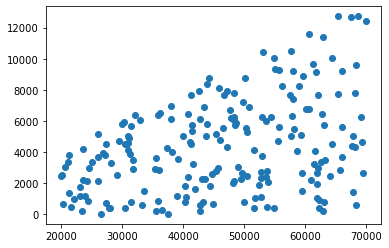

In [37]:
plt.scatter(df1, df2)

**Array**

In [42]:
x1_renda = dados["Renda"]
x2_emprestimo = dados["Emprestimo"]

In [43]:
x1_renda

0       66155.925095
1       34415.153966
2       57317.170063
3       42709.534201
4       66952.688845
            ...     
1995    59221.044874
1996    69516.127573
1997    44311.449262
1998    43756.056605
1999    69436.579552
Name: Renda, Length: 2000, dtype: float64

In [44]:
x2_emprestimo

0       8106.532131
1       6564.745018
2       8020.953296
3       6103.642260
4       8770.099235
           ...     
1995    1926.729397
1996    3503.176156
1997    5522.786693
1998    1622.722598
1999    7378.833599
Name: Emprestimo, Length: 2000, dtype: float64

In [45]:
from sklearn.model_selection import train_test_split
treino, teste, treino_renda, teste_emprestimo = train_test_split(x1_renda, x2_emprestimo)

**Dados para regressão linear**

In [54]:
#Dados para regressão linear
x1_renda = np.array(x1_renda).reshape(len(x1_renda),1)
x1_renda

array([[66155.92509508],
       [34415.15396582],
       [57317.17006303],
       ...,
       [44311.44926231],
       [43756.05660491],
       [69436.57955155]])

In [55]:
x2_emprestimo = np.array(x2_emprestimo).reshape(len(x2_emprestimo),1)
x2_emprestimo

array([[8106.53213129],
       [6564.74501768],
       [8020.95329639],
       ...,
       [5522.78669326],
       [1622.72259832],
       [7378.83359873]])

# Modelo - 1

In [69]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x1_renda, x2_emprestimo)

modelo = LinearRegression()
modelo.fit(x1_renda, x2_emprestimo)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
modelo.intercept_

array([193.62261948])

In [71]:
modelo.coef_

array([[0.09377006]])

In [85]:
modelo.coef_ * 27.74456356 + modelo.intercept_

array([[196.22422901]])

**Grafico da regressão linear**

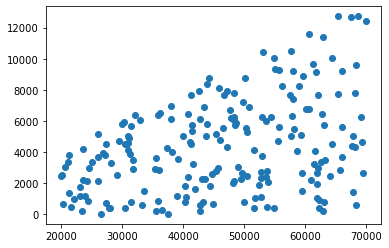

In [75]:
plt.scatter(df1, df2)

Text(0, 0.5, 'Emprestimo')

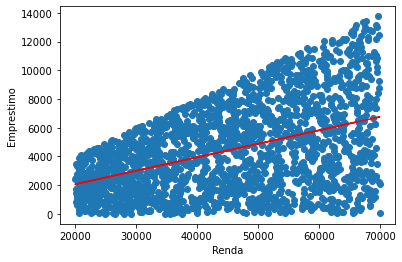

In [72]:
plt.scatter(x1_renda, x2_emprestimo)
plt.plot(x1_renda, regressor.predict(x1_renda), color = "red")
plt.xlabel("Renda")
plt.ylabel("Emprestimo")

# Modelo 2

In [100]:
treino, teste, treino_renda, teste_emprestimo = train_test_split(x1_renda, x2_emprestimo, test_size=0.10)

In [101]:
treino

array([[21593.6226584 ],
       [30497.20450537],
       [63546.16475757],
       ...,
       [34475.21797381],
       [69592.0108282 ],
       [41816.65683165]])

In [102]:
teste

array([[56282.98252588],
       [35020.48877301],
       [25857.7655931 ],
       [26931.06824765],
       [25952.38147071],
       [37598.38508442],
       [23086.25540929],
       [46672.71314422],
       [63830.74743673],
       [54625.50698314],
       [64057.84478877],
       [20145.98859707],
       [56846.47423215],
       [50660.90424545],
       [26578.53669254],
       [57179.40200586],
       [31568.1443247 ],
       [54009.69228242],
       [32921.84857884],
       [56830.27286315],
       [35496.66549545],
       [22372.50523642],
       [41052.365785  ],
       [45326.40367281],
       [45677.87612788],
       [58828.29211652],
       [60672.145586  ],
       [39421.36683501],
       [22516.54034946],
       [53289.0652935 ],
       [62678.64545109],
       [31077.85688946],
       [22371.52219051],
       [29933.20193375],
       [62658.22162852],
       [49640.00470238],
       [36242.44796112],
       [24254.70079063],
       [67978.46685397],
       [64940.24108862],


In [103]:
treino_renda

array([[  458.09372437],
       [ 4573.59408976],
       [ 6170.23911645],
       ...,
       [ 3162.13383735],
       [13025.05657067],
       [ 4534.57597309]])

In [104]:
teste_emprestimo

array([[ 8215.558384  ],
       [ 6832.80304189],
       [ 1810.23233887],
       [ 3668.64677293],
       [ 2109.20077174],
       [ 3641.80841084],
       [ 1256.40115951],
       [ 1408.49771708],
       [ 5271.62698185],
       [ 8619.74517744],
       [ 5774.28195813],
       [  839.83906321],
       [ 5268.22747488],
       [ 7511.00349449],
       [ 3489.84313639],
       [ 2991.96735071],
       [ 5067.41001318],
       [  884.73550467],
       [ 2553.21277795],
       [10462.74044956],
       [  168.05478528],
       [ 1118.92606414],
       [ 4652.95174812],
       [ 5142.11083712],
       [ 2966.24612521],
       [ 5947.64546829],
       [ 6279.68700729],
       [ 6111.96101709],
       [ 4267.45190233],
       [ 8047.14075407],
       [  333.44139815],
       [ 4452.33067919],
       [ 2291.85642756],
       [ 5953.52187129],
       [ 3343.36716094],
       [ 5760.85873372],
       [ 5688.99484912],
       [ 2225.28464349],
       [ 7382.50255133],
       [ 8196.93072553],


In [105]:
x1_renda

array([[66155.92509508],
       [34415.15396582],
       [57317.17006303],
       ...,
       [44311.44926231],
       [43756.05660491],
       [69436.57955155]])

In [106]:
x2_emprestimo

array([[8106.53213129],
       [6564.74501768],
       [8020.95329639],
       ...,
       [5522.78669326],
       [1622.72259832],
       [7378.83359873]])

In [111]:
modelo_10 = LinearRegression()
modelo_10.fit(x1_renda, x2_emprestimo)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
x1_renda

array([[66155.92509508],
       [34415.15396582],
       [57317.17006303],
       ...,
       [44311.44926231],
       [43756.05660491],
       [69436.57955155]])

In [113]:
x2_emprestimo

array([[8106.53213129],
       [6564.74501768],
       [8020.95329639],
       ...,
       [5522.78669326],
       [1622.72259832],
       [7378.83359873]])

In [108]:
modelo_10.score(x1_renda, x2_emprestimo)

0.194583770203958

In [109]:
modelo_10.score(x1_renda, x2_emprestimo)

0.194583770203958

# Modelo  regressão linear - RMSE, MSE, MAE.

**Modelo regressão linear: Com treino e treino de renda**

**RMSE**

In [76]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = np.sqrt(mean_squared_error(treino, treino_renda))
rmse

43086.51522750444

**MAE**

In [77]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(treino, treino_renda)
mae

41015.81561313728

**MSE**

In [78]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(treino, treino_renda)
mse

1856447794.449972

# Modelo regressão linear:  Com dados renda, emprestimo

**RMSE**

In [82]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = np.sqrt(mean_squared_error(x1_renda, x2_emprestimo))
rmse

42984.93155206686

**MAE**

In [83]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(x1_renda, x2_emprestimo)
mae

40887.230323104995

**MSE**

In [84]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(x1_renda, x2_emprestimo)
mse

1847704340.535873